In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importer mon dataset Clean

In [2]:
dataset_path = "Dataset_analyse.csv"
df_clean = pd.read_csv(dataset_path)

Defini la target Y.

Drop la target du Dataset.

In [3]:
y_target = df_clean['charges']

df_clean_without_charges = df_clean.drop('charges', axis=1)

Analyse univariée de chaque variable dans mon dataset et afficher les % de Frequence.

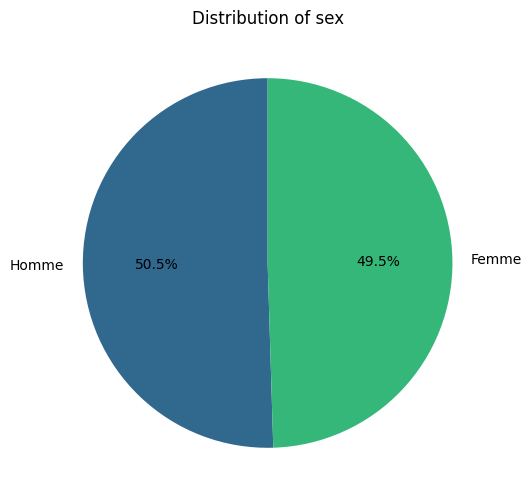

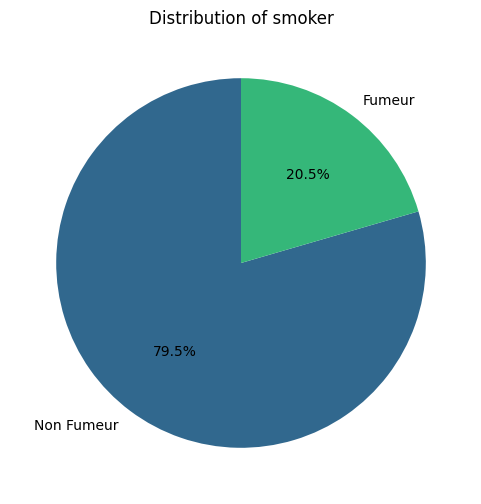

In [4]:
binary_columns = df_clean_without_charges[['sex', 'smoker']]

for col in binary_columns:
    unique_values = df_clean[col].unique()

    if len(unique_values) == 2:  
        plt.figure(figsize=(6, 6))

        distribution = df_clean[col].value_counts(normalize=True) * 100

        if distribution.sum() > 0:
            if col == 'sex':
                distribution.index = ['Homme' if idx == 0 else 'Femme' for idx in distribution.index]
            elif col == 'smoker':
                distribution.index = ['Non Fumeur' if idx == 0 else 'Fumeur' for idx in distribution.index]

            plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(distribution)))

            plt.title(f'Distribution of {col}')
            plt.show()

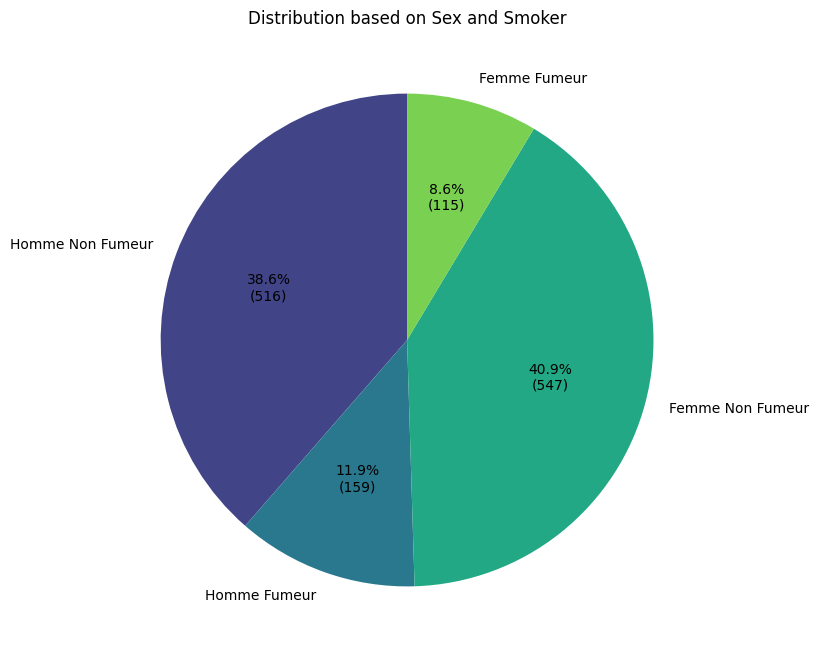

In [5]:
conditions = [
    ((df_clean_without_charges['sex'] == 0) & (df_clean_without_charges['smoker'] == 0)),
    ((df_clean_without_charges['sex'] == 0) & (df_clean_without_charges['smoker'] == 1)),
    ((df_clean_without_charges['sex'] == 1) & (df_clean_without_charges['smoker'] == 0)),
    ((df_clean_without_charges['sex'] == 1) & (df_clean_without_charges['smoker'] == 1))
]
labels = ['Homme Non Fumeur', 'Homme Fumeur', 'Femme Non Fumeur', 'Femme Fumeur']
counts = [condition.sum() for condition in conditions]
total_count = sum(counts)
percentages = [count / total_count * 100 for count in counts]

plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis', n_colors=len(labels))

plt.pie(counts, labels=labels, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, total_count * p / 100), startangle=90, colors=colors)
plt.title('Distribution based on Sex and Smoker')
plt.show()

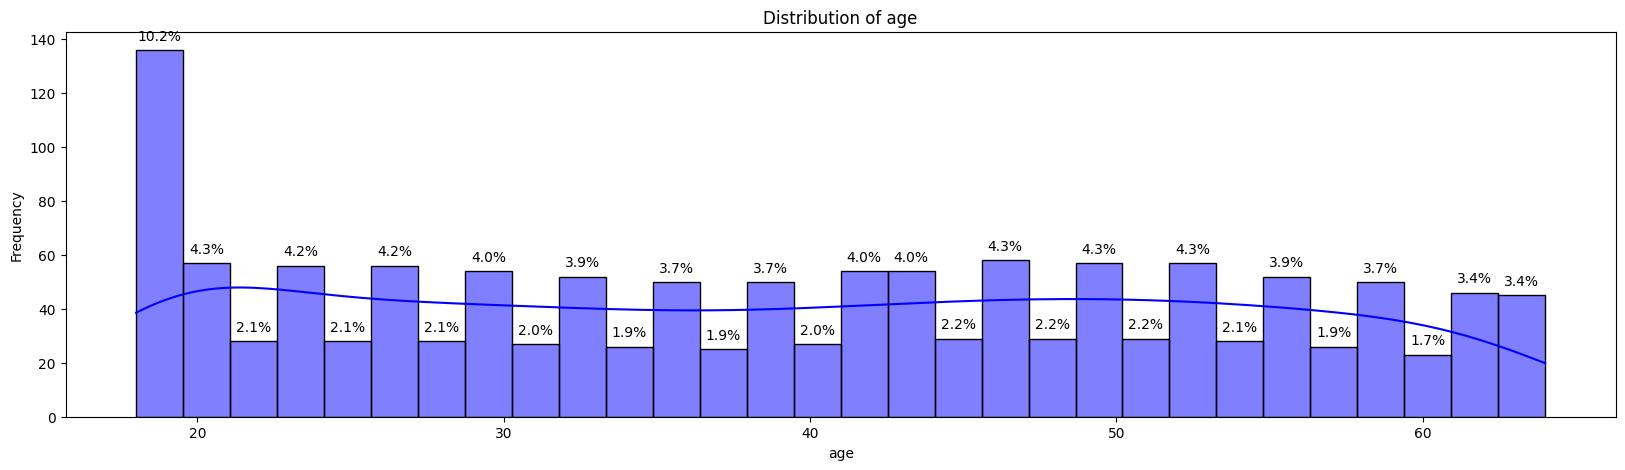

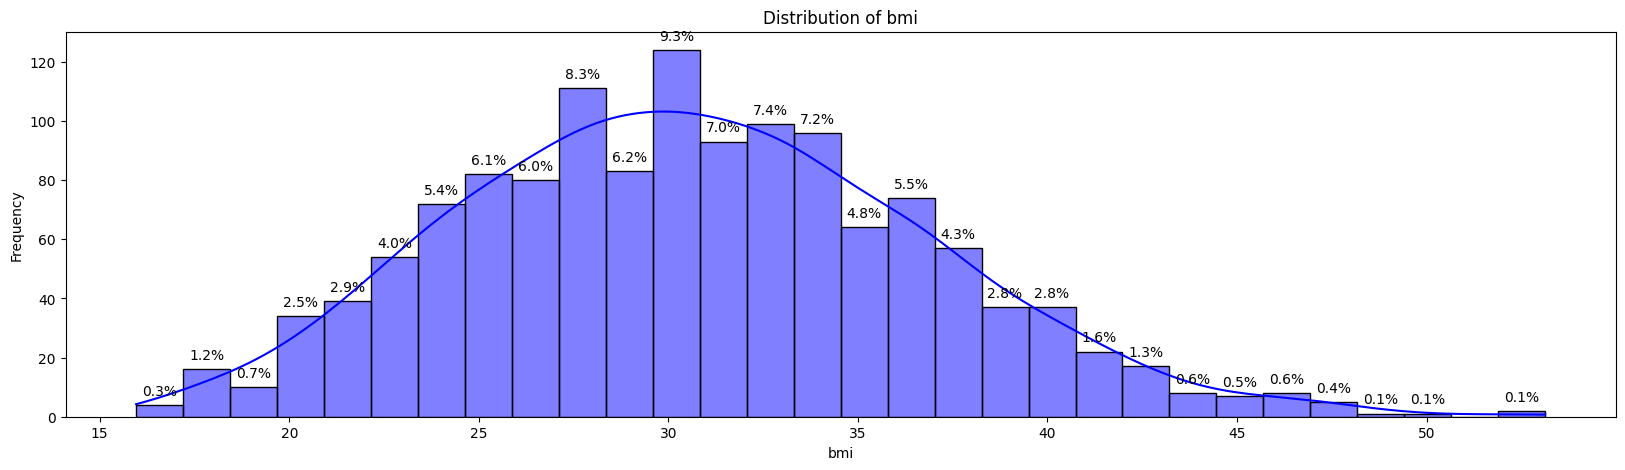

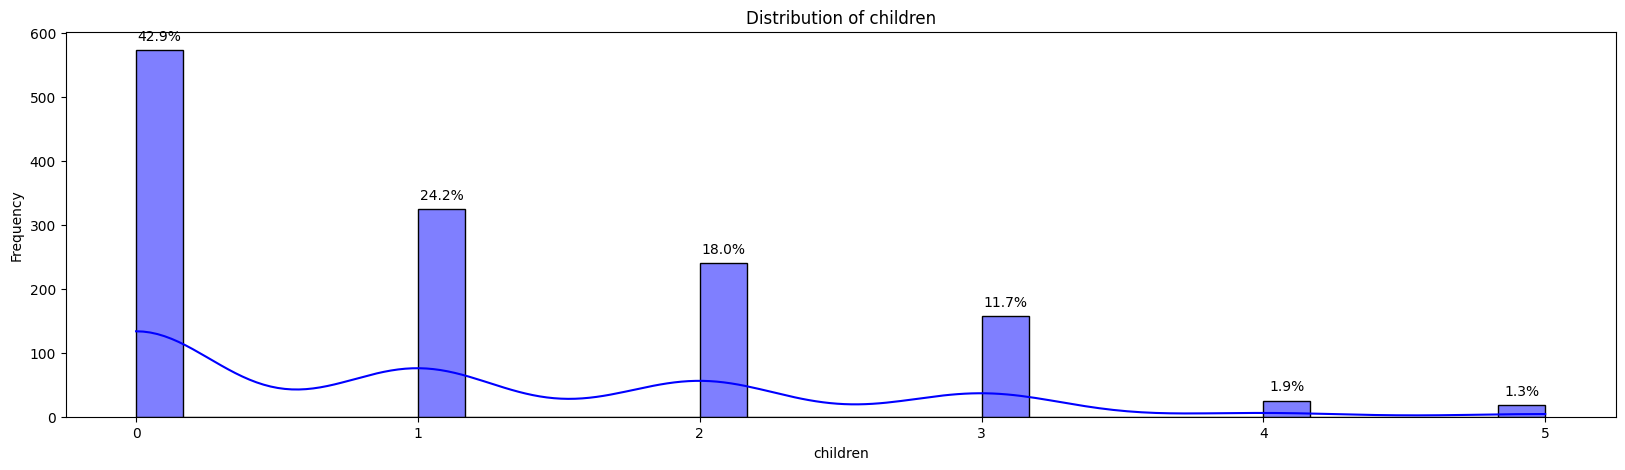

In [6]:
numeric_columns = df_clean_without_charges.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    unique_values = df_clean[col].nunique()
    
    
    if unique_values > 2:
        plt.figure(figsize=(20, 5))
        sns.histplot(df_clean[col], kde=True, bins=30, color='blue')
        
        
        total_count = len(df_clean[col])
        for patch in plt.gca().patches:
            height = patch.get_height()
            percentage = (height / total_count) * 100
            
            
            if height > 0:
                plt.gca().annotate(f'{percentage:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

Étudier la corrélation des variables avec la variable cible.

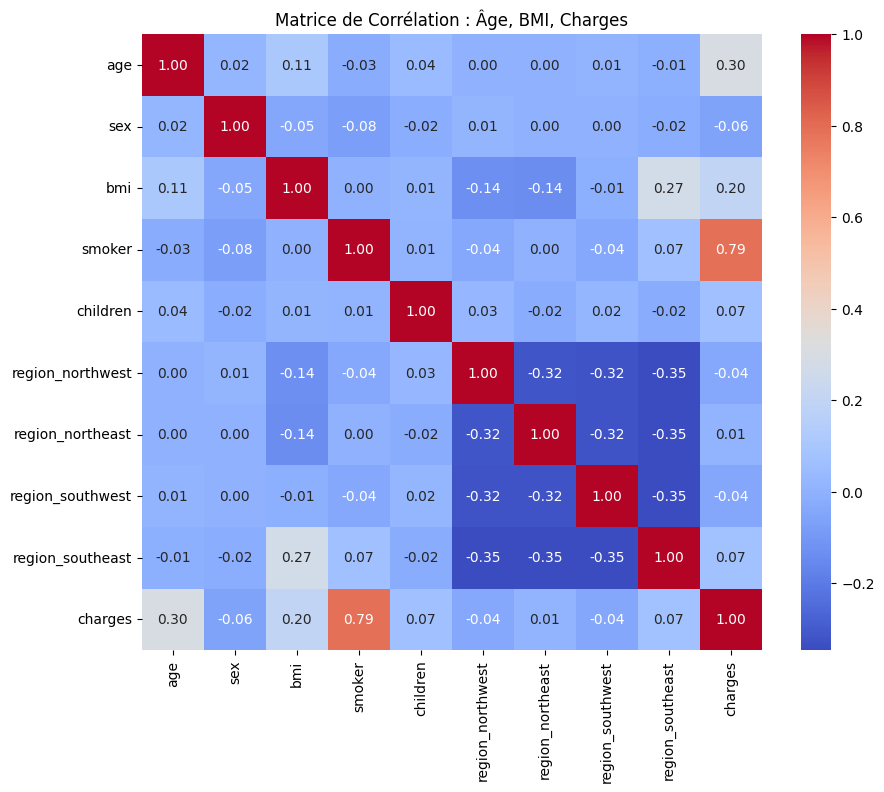

                           Feature  Correlation  Absolute_Correlation
5                          charges     1.000000              1.000000
4                           smoker     0.787234              0.787234
0                              age     0.298308              0.298308
2                              bmi     0.198401              0.198401
13   imc_category_Obesity Class II     0.140223              0.140223
10         imc_category_Overweight    -0.118291              0.118291
12      imc_category_Normal Weight    -0.105655              0.105655
14  imc_category_Obesity Class III     0.078256              0.078256
7                 region_southeast     0.073578              0.073578
3                         children     0.067389              0.067389
1                              sex    -0.058044              0.058044
11    imc_category_Obesity Class I     0.055487              0.055487
15        imc_category_Underweight    -0.048225              0.048225
6                 re

In [7]:
cols = ['age', 'sex', 'bmi', 'smoker','children', 'region_northwest', 'region_northeast', 'region_southwest','region_southeast', 'charges']

correlation_matrix = df_clean[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matrice de Corrélation : Âge, BMI, Charges')

plt.show()

correlation_dict = {}

for col in df_clean.columns:
    correlation = df_clean[col].corr(y_target)
    correlation_dict[col] = correlation

correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlation'])
correlation_df['Absolute_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Absolute_Correlation', ascending=False)

print(correlation_df)

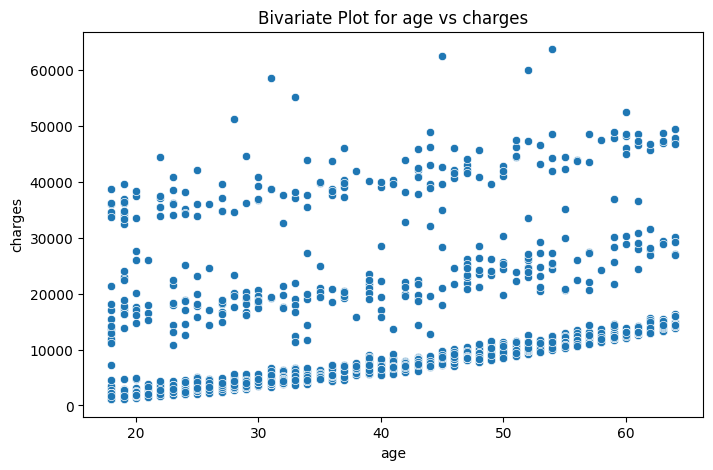

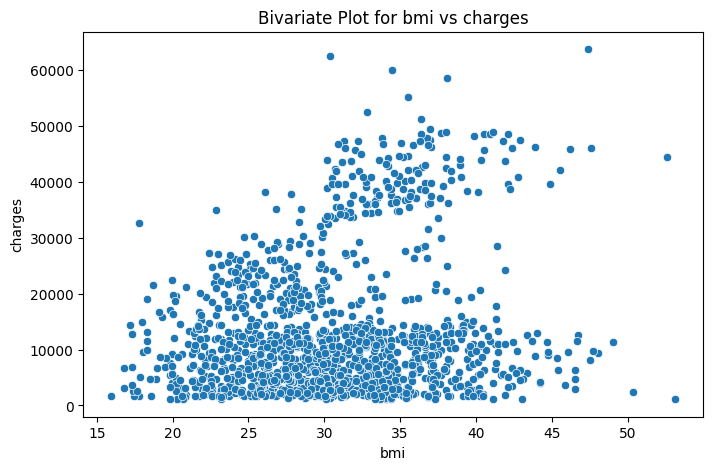

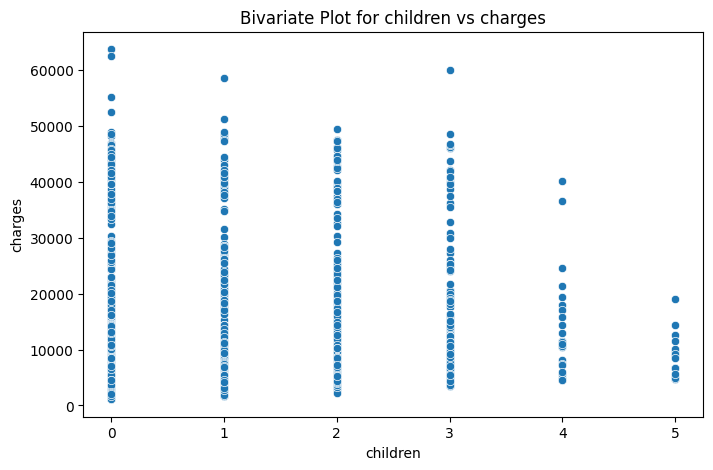

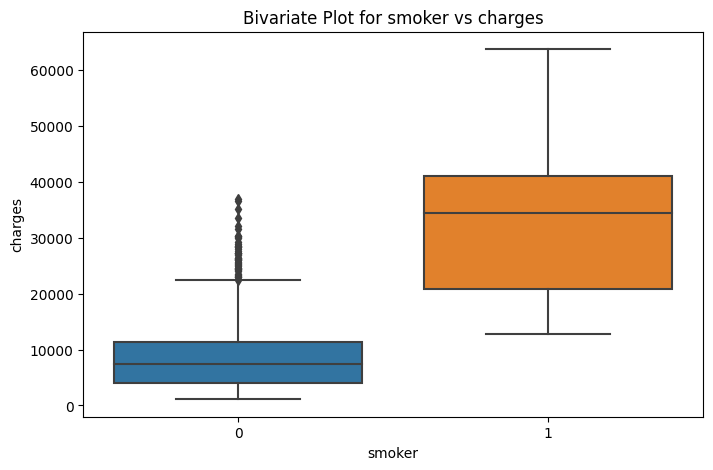

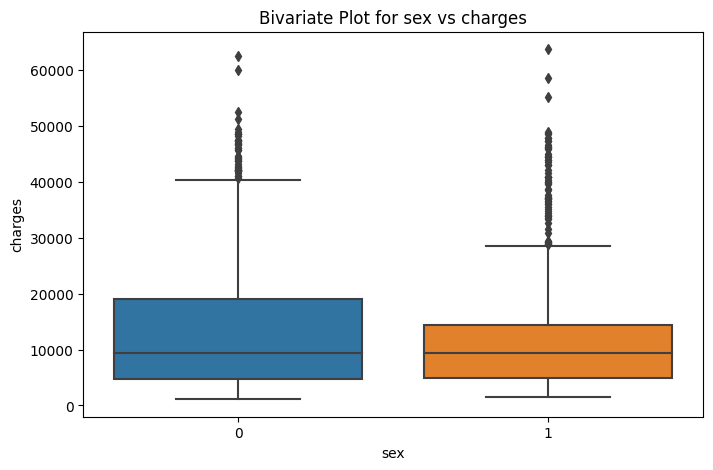

In [8]:
def plot_bivariate(df_clean_without_charges, target, numeric_columns=None, categorical_columns=None):
    if numeric_columns is None:
        numeric_columns = df_clean_without_charges.select_dtypes(include=['float64', 'int64']).columns

    if categorical_columns is None:
        categorical_columns = df_clean_without_charges.select_dtypes(include=['object']).columns

    # Specify the columns you want to include in the plots
    selected_numeric_columns = ['age', 'bmi', 'children']
    selected_categorical_columns = ['smoker', 'sex']

    for col in selected_numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=col, y=target, data=df_clean_without_charges)
        plt.title(f'Bivariate Plot for {col} vs {target.name}')
        plt.xlabel(col)
        plt.ylabel(target.name)
        plt.show()

    for col in selected_categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=col, y=target, data=df_clean_without_charges)
        plt.title(f'Bivariate Plot for {col} vs {target.name}')
        plt.xlabel(col)
        plt.ylabel(target.name)
        plt.show()

# Assuming y_target is defined
y_target = df_clean['charges']

# Call the function
plot_bivariate(df_clean, y_target)

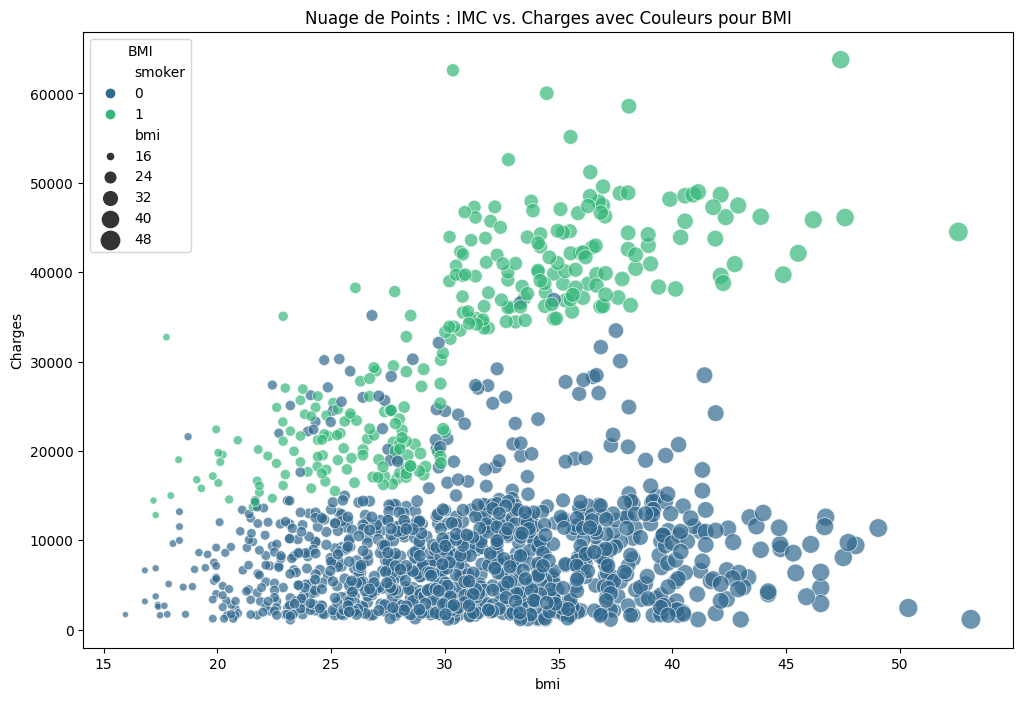

In [9]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='bmi', y='charges',hue='smoker',  palette='viridis', data=df_clean, size='bmi', sizes=(20, 200), alpha=0.7)

# Ajout de titres
plt.title('Nuage de Points : IMC vs. Charges avec Couleurs pour BMI')
plt.xlabel('bmi')
plt.ylabel('Charges')

# Ajout d'une légende pour la taille des points (BMI)
scatter_plot.legend(title='BMI')

# Affichage du graphique
plt.show()

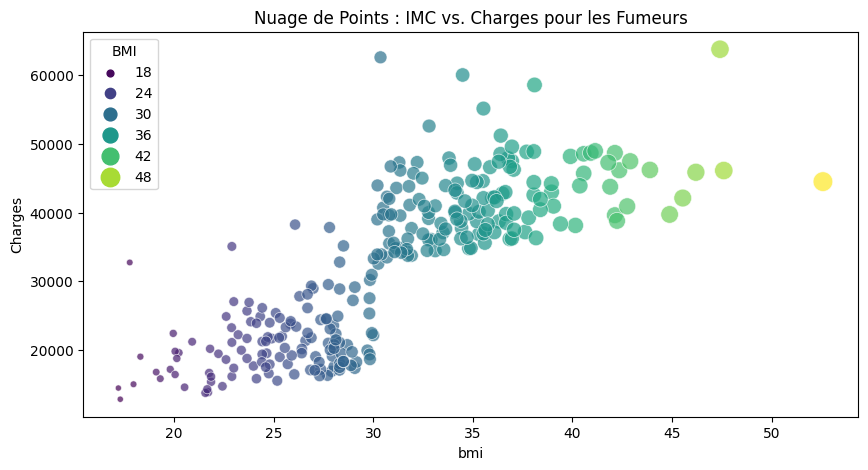

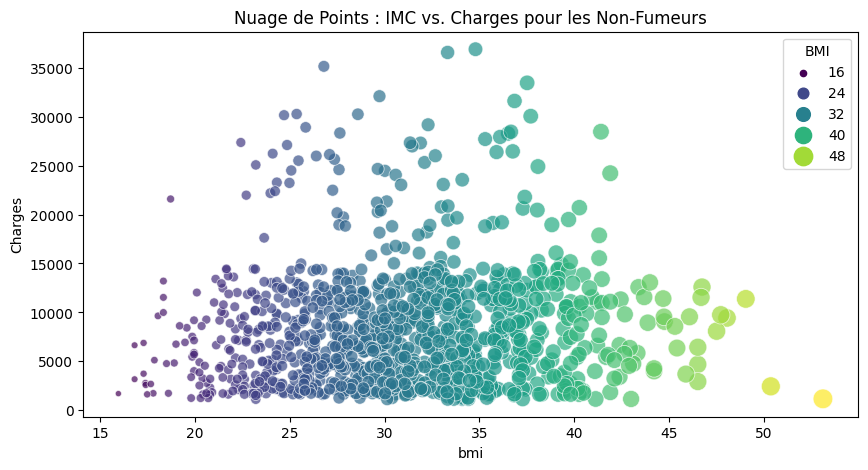

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour smoker = 1
df_smoker = df_clean[df_clean['smoker'] == 1]

# Filtrer les données pour smoker = 0
df_non_smoker = df_clean[df_clean['smoker'] == 0]

# Créer un nuage de points pour les fumeurs
plt.figure(figsize=(10, 5))
scatter_plot_smoker = sns.scatterplot(x='bmi', y='charges', hue='bmi', palette='viridis', data=df_smoker, size='bmi', sizes=(20, 200), alpha=0.7)

# Ajout de titres et légendes
plt.title('Nuage de Points : IMC vs. Charges pour les Fumeurs')
plt.xlabel('bmi')
plt.ylabel('Charges')
scatter_plot_smoker.legend(title='BMI')

# Affichage du graphique pour les fumeurs
plt.show()

# Créer un nuage de points pour les non-fumeurs
plt.figure(figsize=(10, 5))
scatter_plot_non_smoker = sns.scatterplot(x='bmi', y='charges', hue='bmi', palette='viridis', data=df_non_smoker, size='bmi', sizes=(20, 200), alpha=0.7)

# Ajout de titres et légendes
plt.title('Nuage de Points : IMC vs. Charges pour les Non-Fumeurs')
plt.xlabel('bmi')
plt.ylabel('Charges')
scatter_plot_non_smoker.legend(title='BMI')

# Affichage du graphique pour les non-fumeurs
plt.show()


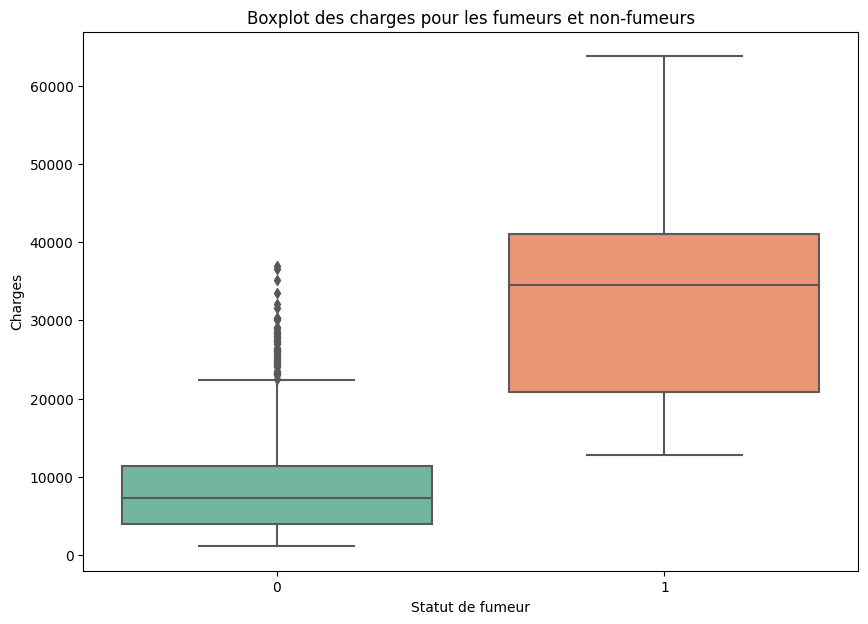

In [15]:

plt.figure(figsize=(10, 7))
sns.boxplot(x='smoker', y='charges', data=df_clean, palette='Set2')

plt.xlabel('Statut de fumeur')
plt.ylabel('Charges')
plt.title('Boxplot des charges pour les fumeurs et non-fumeurs')

plt.show()
